<a href="https://colab.research.google.com/github/monksealseal/hur2/blob/main/Hurricane_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.2 MB/s 
     |████████████████████████████████| 4.9 MB 37.5 MB/s 
     |████████████████████████████████| 365 kB 25.2 MB/s 
     |████████████████████████████████| 1.3 MB 37.4 MB/s 
     |████████████████████████████████| 212 kB 47.7 MB/s 
     |████████████████████████████████| 115 kB 51.7 MB/s 
     |████████████████████████████████| 120 kB 15.7 MB/s 
     |████████████████████████████████| 127 kB 41.7 MB/s 
     |████████████████████████████████| 6.6 MB 1.7 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# New Section

In [3]:
hurricane = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [4]:
path = '/content/gdrive/Othercomputers/My PC/Data'

In [5]:
dls = hurricane.dataloaders(path)

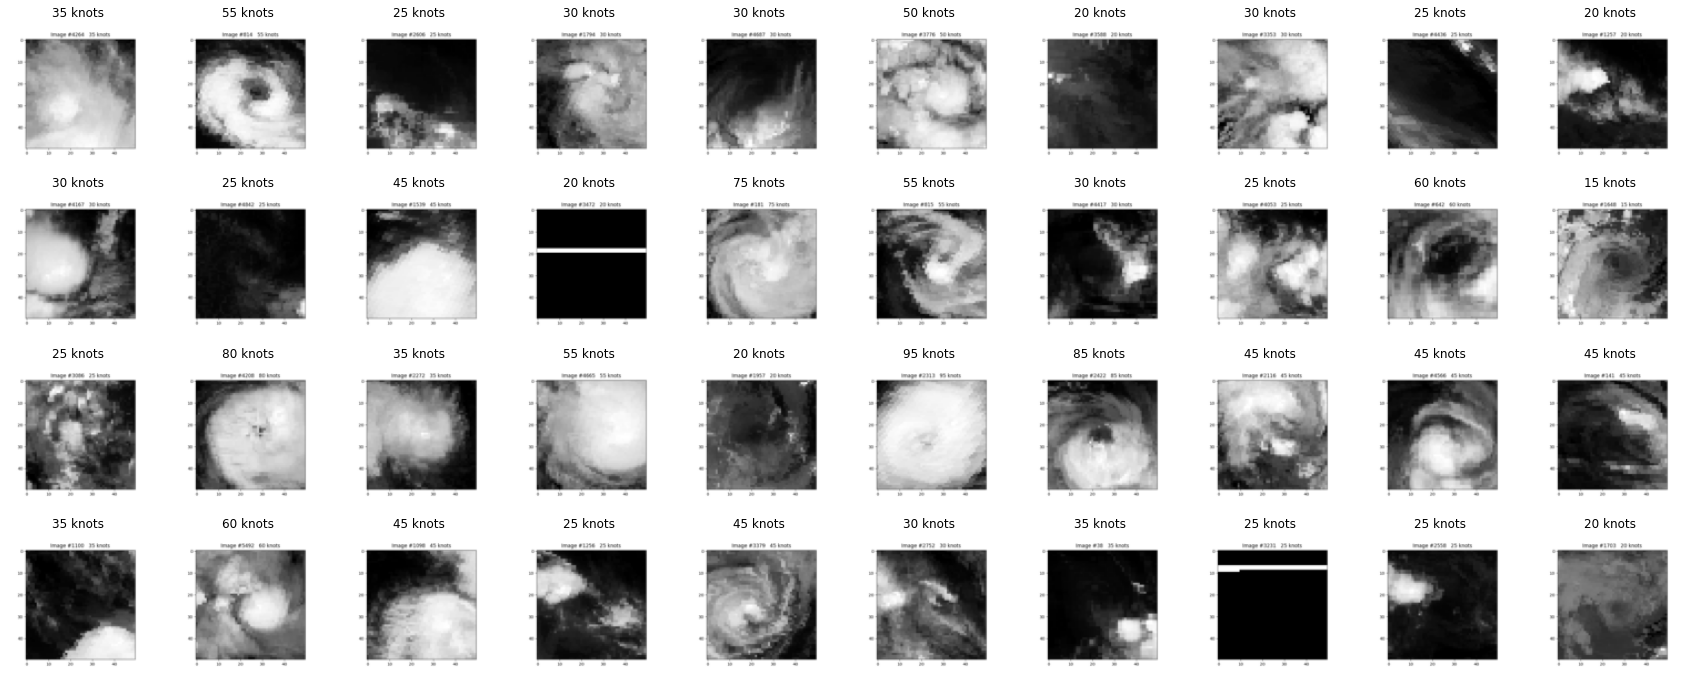

In [6]:
dls.valid.show_batch(max_n=40, nrows=4)

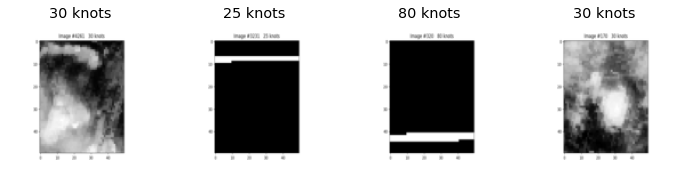

In [10]:
hurricane = hurricane.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = hurricane.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

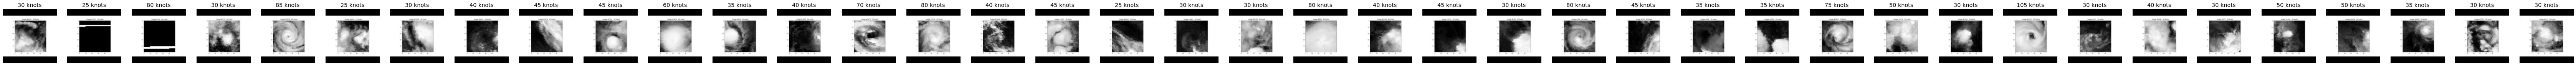

In [11]:
hurricane = hurricane.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = hurricane.dataloaders(path)
dls.valid.show_batch(max_n=40, nrows=1)

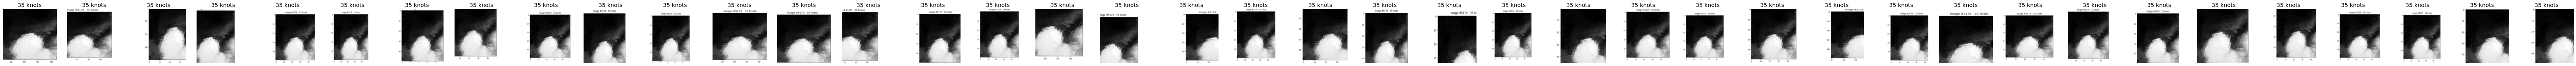

In [9]:
hurricane = hurricane.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = hurricane.dataloaders(path)
dls.train.show_batch(max_n=40, nrows=1, unique=True)

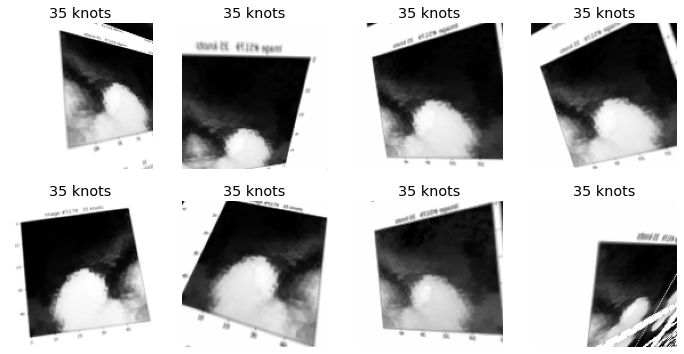

In [12]:
hurricane = hurricane.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = hurricane.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [13]:
hurricane = hurricane.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = hurricane.dataloaders(path)

In [26]:
timm.list_models('vit_small*') 

['vit_small_patch8_224_dino',
 'vit_small_patch16_18x2_224',
 'vit_small_patch16_36x1_224',
 'vit_small_patch16_224',
 'vit_small_patch16_224_dino',
 'vit_small_patch16_224_in21k',
 'vit_small_patch16_384',
 'vit_small_patch32_224',
 'vit_small_patch32_224_in21k',
 'vit_small_patch32_384',
 'vit_small_r26_s32_224',
 'vit_small_r26_s32_224_in21k',
 'vit_small_r26_s32_384',
 'vit_small_resnet26d_224',
 'vit_small_resnet50d_s16_224']

In [7]:
!pip install timm
import timm 
import torch

model = timm.create_model('vit_small_patch32_224_in21k', num_classes=24)
x     = torch.randn(1, 3, 224, 224)
model(x).shape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.1 MB/s 


torch.Size([1, 24])

In [1]:
import timm
from fastai.vision.all import *

In [7]:
learn = vision_learner(dls,'resnet50', metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


epoch,train_loss,valid_loss,error_rate,time
0,4.655725,3.496183,0.931148,03:43


epoch,train_loss,valid_loss,error_rate,time
0,4.013431,3.411738,0.908197,04:48
1,3.733684,3.216719,0.885246,04:46
2,3.595848,3.075905,0.849180,04:48
3,3.416466,2.946167,0.809836,04:47
4,3.270060,2.964683,0.842623,04:51
5,3.105825,2.932656,0.829508,04:47
6,3.005238,2.880845,0.822951,04:49
7,2.910229,2.889565,0.813115,04:46


In [10]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [11]:
from huggingface_hub import push_to_hub_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "monkseal555/testing"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

Cloning https://huggingface.co/monkseal555/testing into local empty directory.


Upload file model.pkl:   0%|          | 3.34k/98.2M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/monkseal555/testing
   0deb8eb..4ce372d  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/monkseal555/testing
   0deb8eb..4ce372d  main -> main



'https://huggingface.co/monkseal555/testing/commit/4ce372ddce9032cacb1243b24a57754c439fad6a'

In [30]:
learn = vision_learner(dls, 'vit_small_patch32_224_in21k', metrics=error_rate)
learn.fine_tune(4)

NameError: ignored

In [19]:
learn.save('restnet26d_88_91522_ejs-3.pkl')

Path('models/restnet26d_88_91522_ejs-3.pkl.pth')

In [20]:
learn.load('restnet26d_88_91522_ejs-3.pkl')

In [21]:
learn.export('restnet26d_88_91522_ejs-3.pkl')

In [ ]:
learn = vision_learner(dls, 'resnet34', metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to C:\Users\esiman/.cache\torch\hub\checkpoints\resnet34-43635321.pth


epoch,train_loss,valid_loss,error_rate,time
0,4.931209,4.129572,0.908333,02:43


epoch,train_loss,valid_loss,error_rate,time
0,4.613862,3.875060,0.925000,03:37
1,4.566304,3.906434,0.900000,03:42
2,4.399632,3.962027,0.891667,03:28
3,4.315609,3.918131,0.908333,03:48
4,4.200663,3.674474,0.875000,03:33
5,4.085007,3.433557,0.858333,03:43
6,4.017476,3.335889,0.883333,03:27
7,3.958813,3.306316,0.883333,04:36


In [ ]:
learn = vision_learner(dls,'vit_small_patch32_224_in21k', metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.789495,3.940839,0.966667,01:31


epoch,train_loss,valid_loss,error_rate,time
0,4.559122,3.673468,0.925000,01:42
1,4.450538,3.504851,0.916667,01:35
2,4.265547,3.490906,0.950000,01:20
3,4.183922,3.544241,0.933333,01:09


In [ ]:
timm.list_models('xg*')

[]

In [ ]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in2

In [3]:
learn = vision_learner(dls,'adv_inception_v3', metrics=error_rate)
learn.fine_tune(4)

NameError: ignored

[Errno 2] No such file or directory: '/content/drive/My drive/.../my_folder'
/content
